<a href="https://colab.research.google.com/github/fathulmaulidan/dataminingb2/blob/main/fathul_maulidhan_plane_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRISP-DM**

#**Import Library**

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

tujuan bisnis dari dataset ini adalah pihak maskapai dapat dengan mudah menentukan sebuah harga penerbangan pesawat berdasarkan kemampuan pesawat yang tertera pada dataset, selain itu pihak maskapai dapat mengetahui kelebihan serta kekurangan dari sebuah pesawat tersebut

##**Assess Situation**

situasi bisnis yang mendasari analisis ini adalah kebingungan pihak maskapai dalam menentukan sebuah harga tiket pesawat karena tidak mengetahui kelebihan dan kekurangan dari setiap pesawat yang ada

##**Data Mining Goals**

tujuan dari data mining dataset ini adalah pihak maskapai bisa memprediksi harga tiket pesawat berdasarkan kelebihan dan kekurangan yang dimiliki sebuah pesawat, serta dapat mengetahui profil lengkap pesawat terbang tesebut

##**Project Plan**

rencana dari proyek ini ialah menganalisis segala faktor yang berkaitan dengan profil pesawat berdasarkan dataset yang ada. selanjutnya, dapat menjelaskan dengan rinci kelebihan dan kekurangan dari sebuah pesawat yang akan menjadi faktor dari menentukan harga dari sebuah pesawat. serta mengeksplosrasi dan mencari ketersinmbungan dari setiap data dan variabel yangg tersedia pada dataset

#**DATA UNDERSTANDING**

##**Collect Initial Data**

sumber dataset berasal dari kaggle link : https://www.kaggle.com/datasets/rafsunahmad/plane-price-prediction

In [150]:
df =pd.read_csv('Plane Price.csv')
data=pd.DataFrame(df)
data.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


##**Describe Data**

####Informasi Dasar

In [151]:
data

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,500 A,Propjet,1000,351,334.0,NaN,3819,"3,242",1930.0,2280.0,"12,050","7,856",43/5,47/8,"1,879",4100000.0
513,100 Darter (S.L. Industries),Propjet,720,312,288.0,89.0,578,"2,380",2280.0,3043.0,"11,200","6,837",43/5,47/8,"1,722",3584000.0
514,520,Propjet,720,290,275.0,87.0,390,"2,236",3230.0,3017.0,"11,200","6,389",43/5,47/8,"1,515",3200000.0
515,2180,Propjet,620,275,270.0,77.0,382,"1,750",2940.0,2446.0,"9,474","5,164",36/8,42/8,"1,336",3240000.0


In [152]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian
data.shape

(517, 16)

bisa dilihat dari dataset diatas, jumlah data atau baris data berjumlah 517 baris dan 16 kolom

####Informasi Lanjutan

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

1. model name    : nama dari model pesawat, bertipe objek
2. engine type   : mipe dari mesin pesawat, bertipe objek
3. HP or lbs thr ea engine : Dua unit rasio daya terhadap berat, bertipe objek
4. Max speed Knots : maksimal kecepatan dari pesawat, bertipe objek
5. Rcmnd cruise Knots : kecepatan standar dari pesawat, bertipe float
6. Stall Knots dirty  : kemacetan pesawat dalam kelajuan, bertipe float
7.  Fuel gal/lbs   : jumlah bahan bakar yang dibutuhkan pesawat, bertipe integer           
8.  All eng rate of climb : kecepatan pesawat dalam posisi vertikal, bertipe objek
9.  Eng out rate of climb : kemampuan mesin dalam lepas landas, bertipe float
10.  Takeoff over 50ft : terbang diatas ketinggian 50ft, bertipe float
11. Landing over 50ft : mendarat diatas ketinggian 50ft, bertipe objek
12. Empty weight lbs : berat pesawat tanpa muatan apapun, bertipe objek
13. Length ft/in : panjang pesawat, bertipe objek
14. Wing span ft/in : panjang sayap pesawat, bertipe objek
15. Range N.M. : jarak tempuh pesawat, bertipe objek
16. Price  : harga satuan pesawat, bertipe float

####Informasi Statistik Deskriptif

In [154]:
#Ketikkan kode disini, untuk menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset kalian
data.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


##**Exploratory Data Analysis**

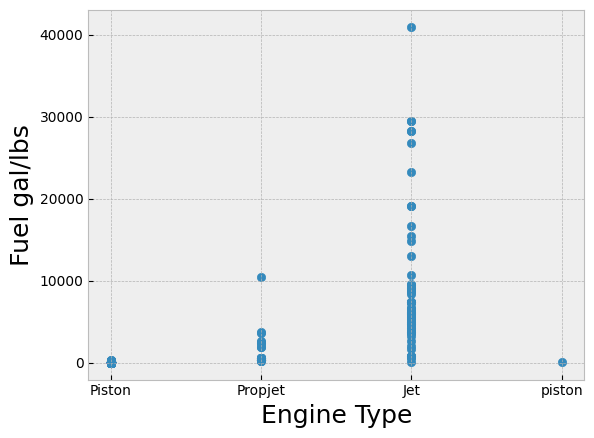

In [155]:
plt.style.use('bmh')
x=data['Engine Type']
y=data['Fuel gal/lbs']
plt.xlabel('Engine Type', fontsize=18)
plt.ylabel('Fuel gal/lbs', fontsize=18)
plt.scatter(x,y)
plt.show()



visualisasi diatas menunjukkan jumlah bahan bakar yang digunakan dari setiap mesin pesawat yang digunakan, tetapi dari visualisasi diatas tidak menunjukkan kekonsistenan dari jumlah bahan bakar walaupun mesin pesawat sama. perbedaan itu dapat dipengaruhi oleh faktor faktor lain yang tertera pada dataset juga.

TAMBAHKAN VISUALISASI KORELASI BESERTA PENJELASANNYA LEBIH BAIK

##**Verify Data Quality**

####Missing Values

In [156]:
nan_data= df[df.isna().any(axis=1)]
nan_data

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
12,G164A-300 AG CAT,Piston,600,NaN,100.0,52.0,64,"1,360",1050.0,1150.0,"5,200","3,650",25/6,42/5,200,NaN
14,G164A-245 AG CAT,Piston,525,128,91.0,52.0,46,"1,350",NaN,540.0,567,"4,500","3,150",42/3,155,NaN
24,7EC,Piston,100,120,113.0,38.0,30,"1,000",NaN,NaN,"1,320",770,20/0,27/0,715,1200000.0
25,Starship 2000 (2000A=increased spds & weights),Piston,150,147,137.0,52.0,40,"1,000",NaN,NaN,"1,800","1,260",22/11,32/0,404,1600000.0
30,100 Darter (S.L. Industries),Piston,150,97,90.0,46.0,39,800,NaN,NaN,"1,800","1,290",22/7,34/6,248,1600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,108-3,Piston,270,236,223.0,58.0,96,"1,230",2050.0,2600.0,"3,368","2,353",26/11,36/1,NaN,2500000.0
484,GC-1B,Piston,217,161,NaN,57.0,61,"1,030",2550.0,1910.0,"2,900","2,003",26/11,36/1,NaN,1930000.0
505,100 Darter (S.L. Industries),Piston,65,123,109.0,37.0,12,"1,000",1000.0,1000.0,850,575,17/7,26/1,NaN,1940000.0
510,560,Propjet,850,400,NaN,90.0,2630,"3,000",2630.0,2650.0,"10,810","7,200",47/3,46/0,"1,746",4100000.0


dataset diatas adalah data yang memiliki nilai kosong. terdapat 96 baris dari total keseluruhan jumlah data yang memiliki nilai kosong pada barisnya

####Outliers Values

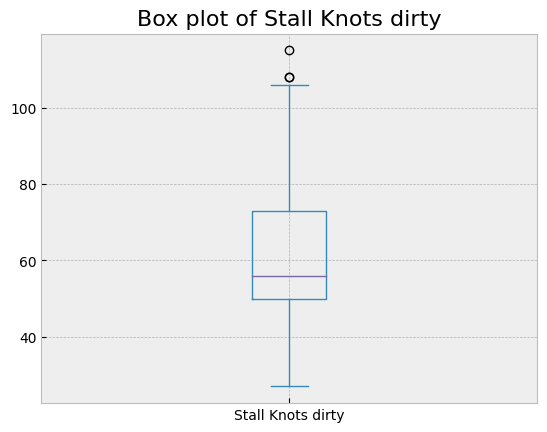

In [157]:
data['Stall Knots dirty'].plot(kind='box')
plt.title('Box plot of Stall Knots dirty', size=16)
plt.show()

pada kolom *Stall Knots dirty* terdapat 2 data diluar dari nilai standar dari pesawat terbang

####Duplicated Values

In [158]:

data.drop_duplicates(inplace=True)
data

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,500 A,Propjet,1000,351,334.0,NaN,3819,"3,242",1930.0,2280.0,"12,050","7,856",43/5,47/8,"1,879",4100000.0
513,100 Darter (S.L. Industries),Propjet,720,312,288.0,89.0,578,"2,380",2280.0,3043.0,"11,200","6,837",43/5,47/8,"1,722",3584000.0
514,520,Propjet,720,290,275.0,87.0,390,"2,236",3230.0,3017.0,"11,200","6,389",43/5,47/8,"1,515",3200000.0
515,2180,Propjet,620,275,270.0,77.0,382,"1,750",2940.0,2446.0,"9,474","5,164",36/8,42/8,"1,336",3240000.0


dilihat dari jumlah nilai dataset diatas, tidak terdapat nilai duplikat pada setiap baris. karena jika terdapat nilai duplikat maka otomatis akan terhapus, sedangkan jumlah baris pada dataset diatas masih lengkap berjumlah 517 baris.

####Inconsistent Values / Noise (Optional)

In [ ]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

#CONSTRUCT DATA#

##melakukan rekayasa fitur##

In [159]:
def categorize_Price(Price):
    if Price < 2500000:
        return 'cheap'
    elif 2500000 <= Price< 4000000:
        return 'standard'
    else:
        return 'expensive'

data['PriceCategory'] = data['Price'].apply(categorize_Price)

In [161]:
data.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price,PriceCategory
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0,cheap
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0,cheap
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0,cheap
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0,cheap
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0,cheap


##Data Reduction##

##megurangi fitur-fitur yang kurang relevan##

In [162]:
df = df.drop(['HP or lbs thr ea engine','Max speed Knots','Rcmnd cruise Knots'], axis=1)

In [163]:
data.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price,PriceCategory
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0,cheap
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0,cheap
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0,cheap
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0,cheap
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0,cheap


In [164]:
data['Engine Type'] = data['Engine Type'].map({'Piston':0,'Propjet':1, 'Jet':2})
data['PriceCategory'] = data['PriceCategory'].map({'cheap': 0, 'standard': 1, 'expensive' : 2}).astype(int)

In [165]:
data = pd.get_dummies(data)

In [167]:
data

,Engine Type,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price,PriceCategory,Model Name_100 Darter (S.L. Industries),Model Name_100 King Air,...,Range N.M._920,Range N.M._922,Range N.M._928,Range N.M._930,Range N.M._934,Range N.M._939,Range N.M._950,Range N.M._957,Range N.M._971,Range N.M._980
0,0.0,91.0,46.0,36,900.0,1300.0,1300000.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,83.0,44.0,15,720.0,800.0,1230000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,78.0,37.0,19,475.0,850.0,1600000.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,78.0,37.0,19,500.0,850.0,1300000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,74.0,33.0,14,632.0,885.0,1250000.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1.0,334.0,NaN,3819,1930.0,2280.0,4100000.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
513,1.0,288.0,89.0,578,2280.0,3043.0,3584000.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
514,1.0,275.0,87.0,390,3230.0,3017.0,3200000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
515,1.0,270.0,77.0,382,2940.0,2446.0,3240000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#MODELLING#

##Pre-processing##

In [199]:
SS = preprocessing.StandardScaler().fit_transform(data)
SS_data = pd.DataFrame(SS, columns= data.columns)
SS_data.head()

,Engine Type,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price,PriceCategory,Model Name_100 Darter (S.L. Industries),Model Name_100 King Air,...,Range N.M._920,Range N.M._922,Range N.M._928,Range N.M._930,Range N.M._934,Range N.M._939,Range N.M._950,Range N.M._957,Range N.M._971,Range N.M._980
0,-0.55011,-1.053901,-0.889150,-0.323659,-1.014158,-0.607880,-1.044164,-0.760326,1.099728,-0.044023,...,-0.108359,-0.088302,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.062318
1,-0.55011,-1.130693,-1.009340,-0.328573,-1.170835,-1.293499,-1.112945,-0.760326,-0.909316,-0.044023,...,-0.108359,-0.088302,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.062318
2,-0.55011,-1.178688,-1.430002,-0.327637,-1.384090,-1.224937,-0.749389,-0.760326,1.099728,-0.044023,...,-0.108359,-0.088302,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.062318
3,-0.55011,-1.178688,-1.430002,-0.327637,-1.362330,-1.224937,-1.044164,-0.760326,-0.909316,-0.044023,...,-0.108359,-0.088302,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.062318
4,-0.55011,-1.217084,-1.670381,-0.328807,-1.247433,-1.176944,-1.093293,-0.760326,1.099728,-0.044023,...,-0.108359,-0.088302,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.044023,-0.062318
